In [4]:
import os

if not os.path.basename(os.getcwd()) == "seed_counting":
    os.chdir("seed_counting")

Cloning into 'seed_counting'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 26 (delta 2), reused 22 (delta 1), pack-reused 0
Unpacking objects: 100% (26/26), done.
Cloned repository


### Rice (Nipponbare) seed detection

Using an object detection and image detection model, we detect individual seeds in an image. For each seed we estimate its width, heigth, and area. the unity is pixel

In [1]:
### importing libraries
from seedimaging.general import RiceSeeds
import keras.backend as K
import matplotlib.pyplot as plt
from skimage.io import imread

In [2]:
### start model configuration
K.clear_session()
## Currently the model is available on a Amazon server
wp = "https://dlmodels-bucket.s3.ap-northeast-1.amazonaws.com/rice.zip"
ricemodel=RiceSeeds(weigths= wp)


Instructions for updating:
Use fn_output_signature instead


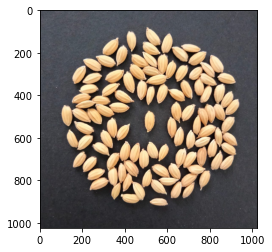

In [23]:
### read a single as example
imagepath = "images/test4.jpeg"
image = imread(imagepath)
plt.imshow(image)

In [19]:
## run the model
riceresults = ricemodel.seeds_detect(image)

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -121.70000  max:  146.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int32
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


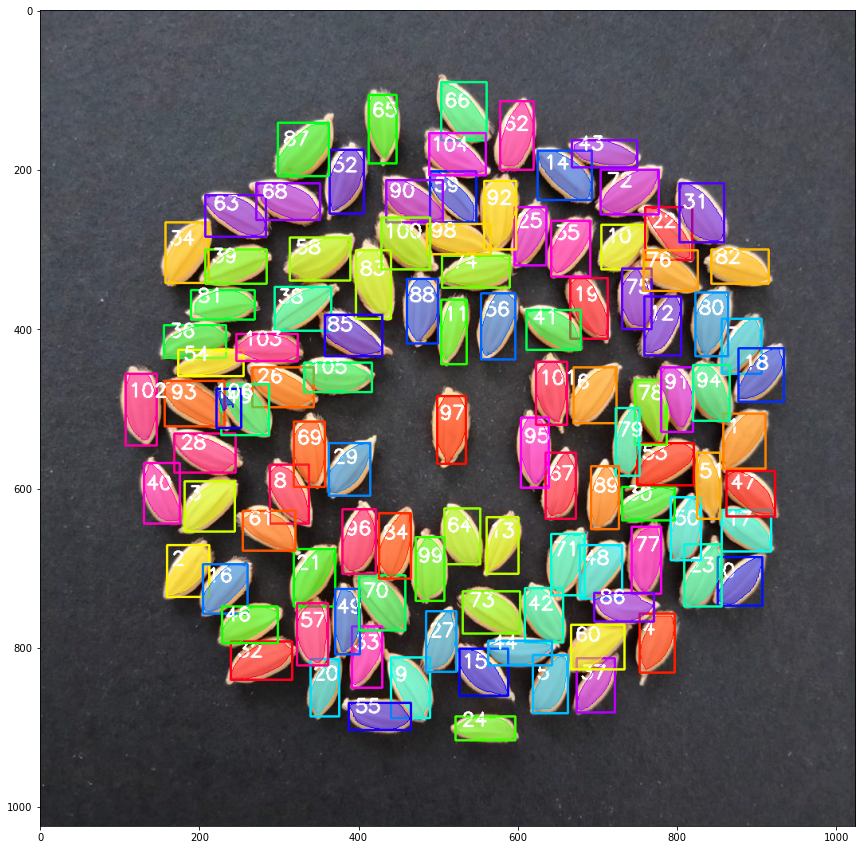

In [20]:
## the final detectios i going to be showed but it will a copple of minutes if there are more than 100 objects
ricemodel.plot_all_detections(figsize = (15,15))


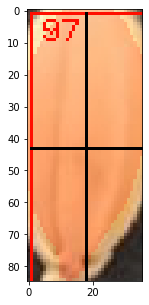

In [21]:
### show a single detection given the seed number
seednumber = 97
ricemodel.plot_individual_seed(seednumber, figsize = (5,5), 
                              addlabel = True, ## the seed number will be added if the value is trye
                              fontscale = 0.3)

In [33]:
## export seeds metrics 
imagename = os.path.basename(imagepath)
imagename = imagename[:imagename.index('.')]

df = ricemodel.seeds_summary()
df.to_csv('summary_{}.csv'.format(imagename))

df


,id,height,width,area
0,0,73.539105,29.732137,1804.0
0,1,78.600254,34.409301,2166.0
0,2,74.953319,32.526912,1945.0
0,3,80.610173,33.941125,2238.0
0,4,72.801099,35.114100,1997.0
...,...,...,...,...
0,102,83.000000,38.000000,2648.0
0,103,76.000000,33.000000,1999.0
0,104,39.204592,37.802116,2377.0
0,105,81.000000,35.000000,2256.0
